In [1]:
import torch

Preparing & loading data 

In [2]:
#lets create some known data using the linear regression formula 

#we'll use a linear regression formula to make a straight line withknown parameters. 

In [3]:
weight = 0.7
bias = 0.3 

#create 

start =0
end =1 
step = 0.02 

x = torch.arange(start,end,step).unsqueeze(dim=1)
x,x.shape 

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 torch.Size([50, 1]))

In [4]:
y = weight *  x + bias

In [5]:
y.shape


torch.Size([50, 1])

In [6]:
y[:10,0]

tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
        0.4260])

#### Splitting data intoo training and test sets

In [7]:
x_train, y_train = x[:40],y[:40]
x_test, y_test = x[40:],y[40:]

How to Visualize the data 

In [8]:
import matplotlib.pyplot as plt
def plot_visualizer(train_data=x_train,
                    train_labels = y_train,
                    test_data = x_test,
                    test_labels=y_test,
                    predictions=None):
    
    plt.figure(figsize=(10,7))

    plt.scatter(x_train,y_train,c='b',label="Training data")
    plt.scatter(x_test,y_test,c='g',label="Testing data")

    if predictions is not None:
        plt.scatter(test_data,predictions, c='r')

    plt.legend()

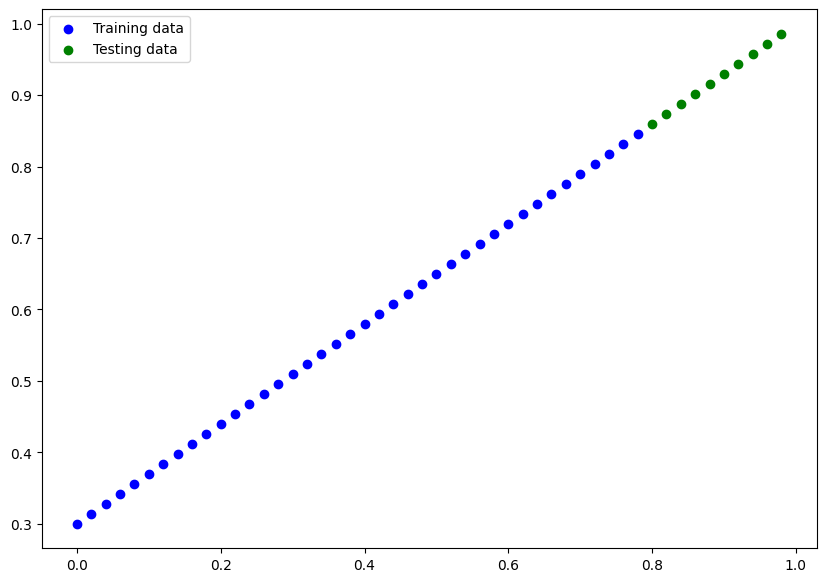

In [9]:
plot_visualizer()


## Build a pytorch model 


In [10]:
#creating a linear regression model class
from torch import nn #basic building blocks for computational graphs 
class LinearRegression(nn.Module): #nn.Module is a base class of all pytorch models 
    def __init__(self):
        super().__init__() #calling all parent class's state(its methods and attributes) for the subclass. 
        self.weights = torch.nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = torch.nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor: #x which is a torch tensor  and returns (->) a torch.tensor
        return self.weights *x + self.bias 



torch.nn.Parameter(torch.randn(3,3)):

Automatic Inclusion in Model Parameters: Any torch.nn.Parameter defined in a nn.Module subclass will be included in the model's parameters.

Requires Gradients: These parameters will be optimized (i.e., have their gradients computed and updated) during the training process.

Custom Learnable Parameters: It's especially useful for defining custom layers where you want to control what should be learned.


In [11]:
#checking the contents of our pytorch model 
# we can do that using .parameters()

RANDOM_SEED = 123 
torch.manual_seed(RANDOM_SEED)
#now we will create an isntance of our moddel 

model_0 = LinearRegression()
list(model_0.parameters())

[Parameter containing:
 tensor([-0.1115], requires_grad=True),
 Parameter containing:
 tensor([0.1204], requires_grad=True)]

In [12]:
model_0.state_dict()

OrderedDict([('weights', tensor([-0.1115])), ('bias', tensor([0.1204]))])

In [13]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

### Making Predictions using torch.inference_mode()

In [14]:
with torch.inference_mode():
    y_preds = model_0(x_test)

y_preds

tensor([[0.0312],
        [0.0290],
        [0.0267],
        [0.0245],
        [0.0223],
        [0.0200],
        [0.0178],
        [0.0156],
        [0.0134],
        [0.0111]])

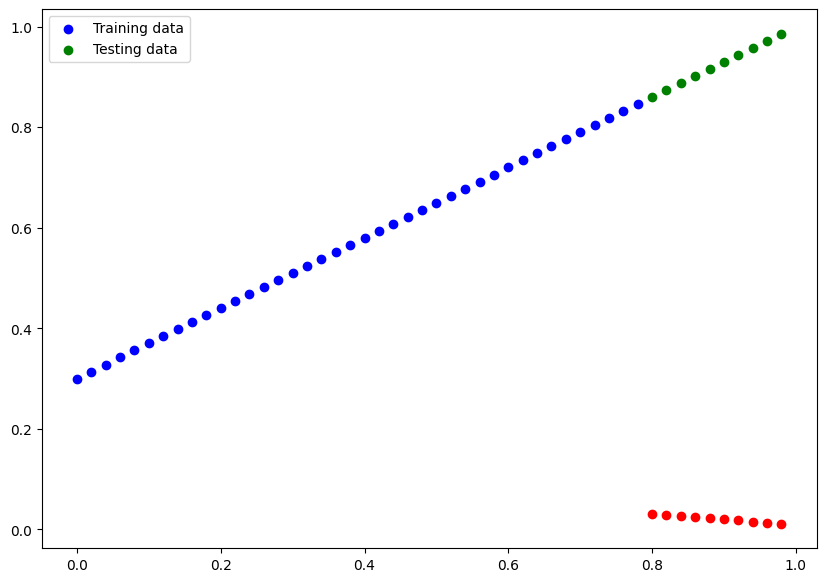

In [15]:
#this is an untrained model.
plot_visualizer(predictions=y_preds)

In [49]:
#Other ways to run inference/evaluation 
with torch.inference_mode():
    y_preds = model_0(x_test)

with torch.no_grad(): #you can also do something like this, however we should use inference_mode() as it is fast and does not keep track of other values in the computation graph
    y_preds1 = model_0(x_test)

model_0.eval() #sets the model into evaluation mode. Here, drop out layers, batch norm etc are disabled so that we can perform inference on the trained weights. 
y_preds, y_preds1

(tensor([[0.8635],
         [0.8774],
         [0.8914],
         [0.9053],
         [0.9192],
         [0.9331],
         [0.9471],
         [0.9610],
         [0.9749],
         [0.9889]]),
 tensor([[0.8635],
         [0.8774],
         [0.8914],
         [0.9053],
         [0.9192],
         [0.9331],
         [0.9471],
         [0.9610],
         [0.9749],
         [0.9889]]))

Lets freakin Train our Model 

In [16]:
loss_fn = nn.L1Loss() #this is the MAE 

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

/home/akshat/miniconda3/envs/ot/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/akshat/miniconda3/envs/ot/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [17]:
#Training Loop
epochs = 50
size=10
for i in range(size):
    for epoch in range(epochs):
        #set the model to training model, but a model's default state is a training model 
        model_0.train() #sets all trainable parameters to requires_grad=True
        y_pred = model_0(x_train)

        #calculate loss 
        loss = loss_fn(y_pred,y_train)
        
        #zero_grad to zero out the gradients of this particular mini batch  
        optimizer.zero_grad()

        #calculate gradients 
        loss.backward()

        #update the parameters
        optimizer.step()
    print(f"the parameters are: {model_0.state_dict()}")    


the parameters are: OrderedDict([('weights', tensor([0.0702])), ('bias', tensor([0.4829]))])
the parameters are: OrderedDict([('weights', tensor([0.1798])), ('bias', tensor([0.5104]))])
the parameters are: OrderedDict([('weights', tensor([0.2682])), ('bias', tensor([0.4814]))])
the parameters are: OrderedDict([('weights', tensor([0.3535])), ('bias', tensor([0.4454]))])
the parameters are: OrderedDict([('weights', tensor([0.4389])), ('bias', tensor([0.4094]))])
the parameters are: OrderedDict([('weights', tensor([0.5245])), ('bias', tensor([0.3739]))])
the parameters are: OrderedDict([('weights', tensor([0.6099])), ('bias', tensor([0.3379]))])
the parameters are: OrderedDict([('weights', tensor([0.6964])), ('bias', tensor([0.3064]))])
the parameters are: OrderedDict([('weights', tensor([0.6964])), ('bias', tensor([0.3064]))])
the parameters are: OrderedDict([('weights', tensor([0.6964])), ('bias', tensor([0.3064]))])


In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6964])), ('bias', tensor([0.3064]))])

In [19]:
model_0.eval()

with torch.no_grad():
    y_pred_new = model_0(x_test)

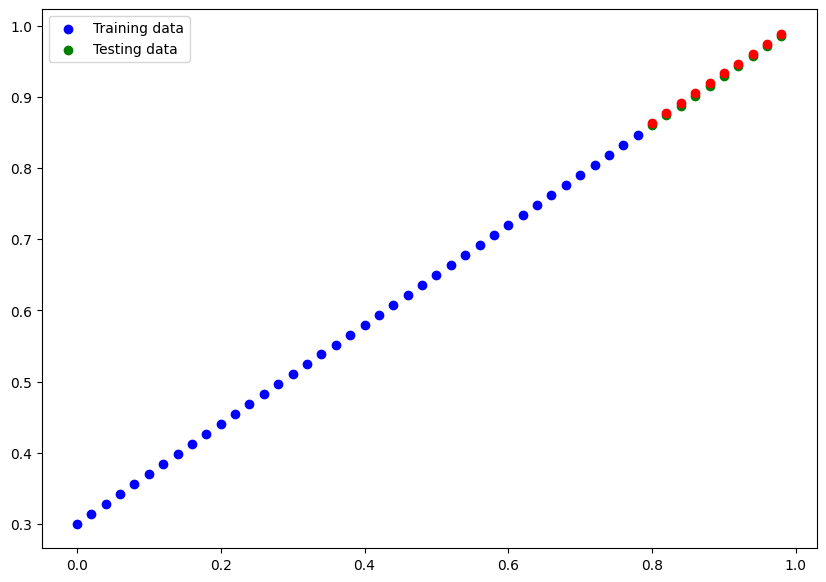

In [20]:
plot_visualizer(predictions=y_pred_new)